In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [2]:
tf.config.experimental.list_physical_devices() 

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

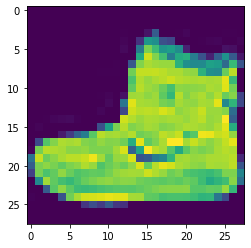

In [6]:
plt.imshow(train_images[0])

In [7]:
train_labels[0]

9

In [8]:
class_names[train_labels[0]]

'Ankle boot'

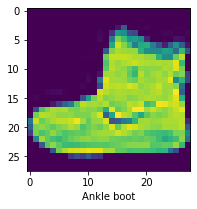

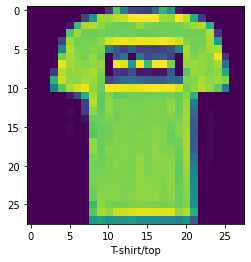

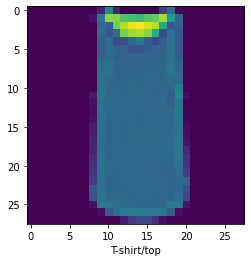

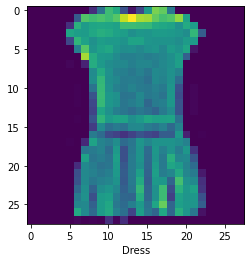

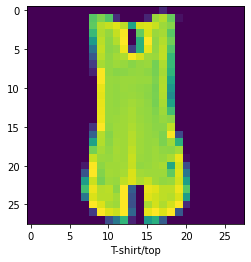

In [9]:
plt.figure(figsize=(3,3))
for i in range(5):
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

In [10]:
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

In [28]:
[3]*2


[3, 3]

In [31]:
def get_model(hidden_layers=1):
    # Flatten layer for input
    layers = [keras.layers.Flatten(input_shape=(28, 28))]
    # hideen layers
    for i in range(hidden_layers):
        layers.append(keras.layers.Dense(500, activation='relu'),)
    # output layer    
    layers.append(keras.layers.Dense(10, activation='sigmoid'))

    model = keras.Sequential(layers)
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [32]:
model = get_model(1)
model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 998us/step - loss: 0.4967 - accuracy: 0.8250
Epoch 2/5
1875/1875 [==============================] - 2s 997us/step - loss: 0.3679 - accuracy: 0.8660
Epoch 3/5
1875/1875 [==============================] - 2s 996us/step - loss: 0.3281 - accuracy: 0.8784
Epoch 4/5
1875/1875 [==============================] - 2s 1000us/step - loss: 0.3044 - accuracy: 0.8878
Epoch 5/5
1875/1875 [==============================] - 2s 990us/step - loss: 0.2867 - accuracy: 0.8941


In [13]:
model.predict(test_images_scaled)[2]

array([4.6052941e-05, 8.2418454e-01, 6.8676393e-08, 2.6729811e-07,
       2.9691930e-07, 9.5642016e-13, 7.7830641e-08, 9.1786557e-15,
       1.2696315e-09, 2.6267929e-10], dtype=float32)

In [14]:
test_labels[2]

1

In [15]:
tf.config.experimental.list_physical_devices() 

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

<h4 style="color:purple">5 Epocs performance comparison for 1 hidden layer</h4>

In [34]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model = get_model(1)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5015 - accuracy: 0.8243
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3689 - accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3300 - accuracy: 0.8788
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3050 - accuracy: 0.8870
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2859 - accuracy: 0.8938
12.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [35]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    model = get_model(1)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5021 - accuracy: 0.8241
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3699 - accuracy: 0.8664
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3306 - accuracy: 0.8787
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3031 - accuracy: 0.8884
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2871 - accuracy: 0.8935
9.83 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<h4 style="color:purple">5 Epocs performance comparison with 5 hidden layers</h4>

In [36]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model = get_model(5)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7209 - accuracy: 0.6222
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5364 - accuracy: 0.6840
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3716 - accuracy: 0.8674
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3337 - accuracy: 0.8800
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3138 - accuracy: 0.8864
36.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [37]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    model = get_model(5)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5490 - accuracy: 0.7943
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3940 - accuracy: 0.8570
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3560 - accuracy: 0.8718
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3290 - accuracy: 0.8813
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3102 - accuracy: 0.8877
12.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


**Here are final performance results**

| Epoch | CPU | GPU  |
|:------|:------|:------|
| 1 | 12.8 sec | 9.83 sec |
| 5 | 36.4 sec | 12.7 sec |